In [1]:
%matplotlib inline

In [2]:
from timeit import default_timer

In [54]:
import d3dshot
import mss
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
d = d3dshot.create(capture_output="numpy")

In [5]:
region = (100, 100, 500, 650)
monitor = {'left': region[0], 'top':region[1], 'width':region[2]-region[0], 'height': region[3]-region[1]}

In [10]:
def profile_d3dshot():
    start = default_timer()
    image = d.screenshot(region=region)
    end = default_timer()
    dt = end-start
    image = image[:,:,:3]/255
    return (image, dt)

In [55]:
def profile_mss():
    start = default_timer()
    with mss.mss() as screen:
        image = screen.grab(monitor)
    image = np.array(image)[:,:,:3][:,:,::-1]
    end = default_timer()
    dt = end-start
    return (image, dt)

0.021861200000103054
(550, 400, 3)


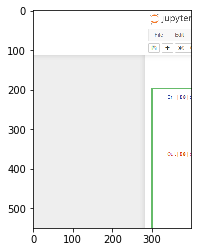

In [89]:
image, dt = profile_d3dshot()
#image, dt = profile_mss()
print(dt)
print(image.shape)
plt.imshow(image)

0.013746600000104081
(550, 400, 3)


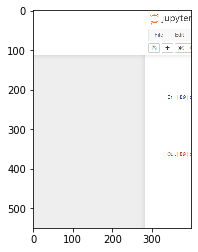

In [92]:
image, dt = profile_mss()
print(dt)
print(image.shape)
plt.imshow(image)